In [24]:
import numpy as np

In [25]:
# load the mnist dataset

def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [43]:
from torch import nn

class MnistNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 128)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        return x



guess: tensor([ 23.3855,  -7.8987,  -5.9964,  25.2683,   6.5822,  13.7587,   6.0398,
         -5.3966,  -5.4933, -16.9322], grad_fn=<AddBackward0>), target: tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
guess: tensor([ 11.9708, -15.5116,  23.6990,   9.9720, -23.6368, -11.9337,  12.6562,
         19.9011,  29.9672, -30.0034], grad_fn=<AddBackward0>), target: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
guess: tensor([  5.6478,  -2.6819,  -6.6979,  17.6434, -36.1544,  32.8662,   9.7047,
        -13.5922, -18.9388,  -8.8908], grad_fn=<AddBackward0>), target: tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
guess: tensor([ 45.5879, -12.9802, -22.5290, -12.8903, -13.0242, -19.1846, -31.5671,
         -6.7117,  29.4641, -12.4364], grad_fn=<AddBackward0>), target: tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
guess: tensor([ 42.2992,  -2.0287, -28.2344,   1.9872,  20.6913,   6.1742, -21.0511,
         -0.7413,  22.7054,   7.4144], grad_fn=<AddBackward0>), target: tensor([0., 0., 0.,

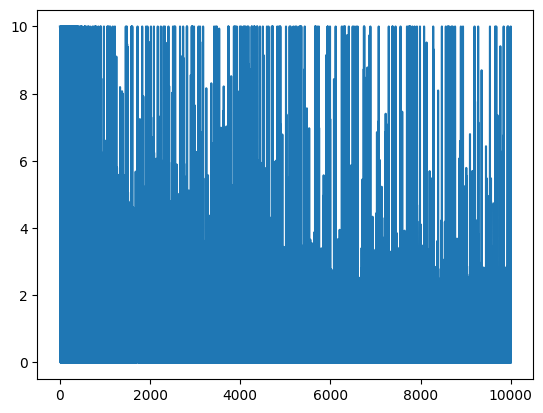

In [44]:
import torch
import math
import random
import matplotlib.pyplot as plt

model = MnistNet()

# train
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)
loses = []
for i in range(10000):
    samp = math.floor(random.random()*len(X_train))
    inpt = torch.tensor(X_train[samp].reshape((-1, 28*28)[0])).float()
    target_n = torch.tensor(Y_train[samp])
    target = nn.functional.one_hot(target_n.long(), 10).float()
    optim.zero_grad()
    guess = model(inpt)
    print(f"guess: {guess}, target: {target}")
    loss = loss_function(guess, target)
    loss.backward()
    optim.step()
    loses.append(min(loss.item(), 10))
plt.plot(loses)

In [65]:
samp = 10
corr = 0
for i in range(10000):
    samp = math.floor(random.random()*len(X_test))
    print(samp)
    X = torch.tensor(X_test[samp].reshape((-1, 28*28))).float()
    Y = Y_test[samp]
    guess = torch.argmax(model(X))
    print(f"{Y} == {guess.item()}")
    if Y == guess: corr += 1
    print(f"accuracy: {corr/(i+1)*100}%")

1191
0 == 6
accuracy: 0.0%
5565
9 == 4
accuracy: 0.0%
512
2 == 2
accuracy: 33.33333333333333%
5269
9 == 7
accuracy: 25.0%
9138
6 == 6
accuracy: 40.0%
5029
9 == 9
accuracy: 50.0%
3807
8 == 8
accuracy: 57.14285714285714%
6234
2 == 2
accuracy: 62.5%
571
4 == 4
accuracy: 66.66666666666666%
5009
9 == 4
accuracy: 60.0%
9015
7 == 8
accuracy: 54.54545454545454%
4317
3 == 7
accuracy: 50.0%
6070
8 == 8
accuracy: 53.84615384615385%
4812
2 == 2
accuracy: 57.14285714285714%
3228
4 == 4
accuracy: 60.0%
5637
1 == 1
accuracy: 62.5%
7581
1 == 1
accuracy: 64.70588235294117%
9714
0 == 0
accuracy: 66.66666666666666%
7406
2 == 4
accuracy: 63.1578947368421%
997
0 == 0
accuracy: 65.0%
380
0 == 0
accuracy: 66.66666666666666%
2612
1 == 1
accuracy: 68.18181818181817%
2239
1 == 1
accuracy: 69.56521739130434%
751
5 == 5
accuracy: 70.83333333333334%
8224
5 == 5
accuracy: 72.0%
7908
7 == 7
accuracy: 73.07692307692307%
9096
1 == 1
accuracy: 74.07407407407408%
6056
8 == 8
accuracy: 75.0%
7603
8 == 6
accuracy: 72.4137